In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [2]:
cate = "primaryNivo"
df_cox_pfs = pd.read_csv(f"./cox_result/cox_result_{cate}_pfs.txt",index_col=0)
p = df_cox_pfs[df_cox_pfs["p"]<0.01].index

df_cox_os = pd.read_csv(f"./cox_result/cox_result_{cate}_os.txt",index_col=0)
o = df_cox_os[df_cox_os["p"]<0.01].index
gene_list = list(set([ items for i in o for items in i.split("_")] + [ items for i in o for items in i.split("_")]))

for i in set(p.tolist()).intersection(o.tolist()):
    print(i)

In [3]:
import gseapy as gp

In [4]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=gene_list , # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human','CellMarker_Augmented_2021'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

enr

/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:671: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:671: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


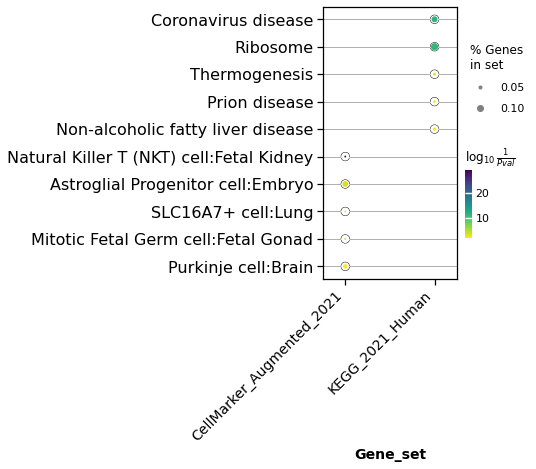

In [5]:
from gseapy import barplot, dotplot
import seaborn as sns
from matplotlib import pyplot as plt
import scienceplots
plt.rc('font', family='DejaVu Sans')
ax = dotplot(enr.results,
              column="Adjusted P-value",#
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',cutoff = 0.05
             )
plt.savefig(f"f4.{cate}.ora.tif",bbox_inches='tight')
#plt.savefig(f"f4.{cate}.ora.svg",bbox_inches='tight')